<table align="center" width="100%">
    <tr>
        <td>
            <div align="center">
                <font color="#7F0542" size="6">
                    <b>Chi-square Test</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='red'>**Please note that any topics that are not covered in today's lecture will be covered in the next lecture.**</font>

## <font color='blue'>**Content**</font>

1. Paired T-Test
2. Recap of conceptual flow
3. Example: Movie Night
4. Degrees of freedom
5. Chi-square Goodness of fit test
  - Example
6. Chi-square Test for Independence
  - Example
7. Assumptions of Chi-Square Test

## <font color='blue'>Paired T-test</font>

<font color='purple'>**Recap Independent t-test**</font>

- In the independent t-test, we compared the means of two separate and independent samples.
- In this test, you have two sets of data, each representing a different group.

- For example,
  - It could be two groups of individuals undergoing different treatments,
  - Two employee groups with varying salaries,
  - Two groups of students with different IQ scores.
  - ...etc

- The t-test assesses whether the means of these two groups are significantly different from each other.

- The nature of data we deal with here is **independent.**

<font color='purple'>**Paired T-test setup:**</font>

- A paired t-test is used when you have a situation where two sets of data points are not independent of each other, but rather they're related in pairs.

- This typically occurs when you're studying the impact of a treatment, intervention, or change within the same subjects over time or in some paired way.

- In your case, you're comparing "Before" and "After" measurements on an individual basis. For each person, you have two measurements:

  - **Person 1: Before and After**
  - **Person 2: Before and After**

- The paired t-test takes into account the paired nature of the data.

- It calculates the mean difference ($\mu_{after} - \mu_{before}$) of the paired measurements and then assesses whether it is statistically significant or not.

- This helps you determine if there's a significant change between the "Before" and "After" measurements within each pair.

In contrast to the **Independent T-test** (one and two sample), that we saw, this is known as **Dependent / Paired T-test**

Let's solve an example

<font color='purple'>Will problem-solving sessions help students?</font>

Test 1: Before the session

Test 2: After the session

In [ ]:
from scipy.stats import ttest_rel
import pandas as pd

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae -O problem_solving.csv

--2024-01-17 13:27:49--  https://drive.google.com/uc?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.google.com (drive.google.com)... 172.253.63.100, 172.253.63.102, 172.253.63.138, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae [following]
--2024-01-17 13:27:49--  https://drive.usercontent.google.com/download?id=1PZ1cC8nBZEtvnOYjfrg4xyErI-5i_-ae
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.167.132, 2607:f8b0:4004:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1277 (1.2K) [application/octet-stream]
Saving to: ‘problem_solving.csv’

problem_solving.csv 100%[===================>]   1.25K  --.-KB/s    in 0s      

2024-01-17 13:27:50 (19.6 M

In [ ]:
Path= '/content/problem_solving.csv'
df_ps = pd.read_csv(Path)

In [ ]:
len(df_ps)

137

In [ ]:
df_ps.head()

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43


In [ ]:
df_ps.describe()

,id,test_1,test_2
count,137.000000,137.000000,137.000000
mean,68.000000,60.489051,62.430657
std,39.692569,17.080311,17.516293
min,0.000000,30.000000,27.000000
25%,34.000000,46.000000,48.000000
50%,68.000000,59.000000,62.000000
75%,102.000000,75.000000,77.000000
max,136.000000,89.000000,96.000000


> <font color='purple'>**Null and Alternate hypothesis**</font>

- Null Hypothesis ($H_0$): Problem-solving has no effect on the test scores.
  - In other words, the mean test scores before (test_1) and after (test_2) problem-solving are equal.

- Alternative Hypothesis ($H_a$): Problem-solving had an effect on the test scores.
  - This implies that the mean test scores before and after problem-solving are not equal.

### <font color='purple'>Option 1:</font> $H_a$: $\mu_{before} \neq \mu_{after}$

In [ ]:
# H0: Problem-solving has no effect
# Ha: Problem-solving had an effect

statistic, pvalue = ttest_rel(df_ps["test_1"], df_ps["test_2"])
print("Test statistic:",statistic)
print("pvalue:",pvalue)

Test statistic: -5.502886353508166
pvalue: 1.795840353792313e-07


In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


### <font color='purple'>Option 2:</font> $H_a$ : $\mu_{before}<\mu_{after}$

In [ ]:
# H0: Problem solving has no effect
# Ha: Problem solving improved the scores

statistic, pvalue = ttest_rel(df_ps["test_1"], df_ps["test_2"],alternative="less")
print("Test statistic:",statistic)
print("pvalue:",pvalue)

Test statistic: -5.502886353508166
pvalue: 8.979201768961566e-08


In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Reject H0


### <font color='purple'>Option 3:</font> $H_a: \mu_{before} > \mu_{after}$

In [ ]:
# H0: Problem solving has no effect
# Ha: Problem solving deteriorated the scores

statistic, pvalue = ttest_rel(df_ps["test_1"], df_ps["test_2"],alternative="greater")
print("Test statistic:",statistic)
print("pvalue:",pvalue)

Test statistic: -5.502886353508166
pvalue: 0.9999999102079823


In [ ]:
alpha = 0.05 # 95% confidence

if pvalue < alpha:
  print('Reject H0')
else:
  print ('Fail to Reject H0')

Fail to Reject H0


---



### <font color='purple'>Let's recall our conceptual learnings in the T-test what was the setup for two variables?</font>

1) Numerical Vs Numerical

2) Numerical Vs Categorical

3) Categorical Vs Categorical

- <font color='purple'>Numerical Vs Categorical (2 Categories):</font>
  - We use Two sample T-test.
  - It helps us see if there's a difference in the numerical values between these two categories.
- <font color='purple'>Numerical Vs Categorical (>2 Categories):</font>
  - We use the ANOVA test.
  - This test helps us figure out if there's a significant difference among the numerical values when we have more than two categories to compare.
  - **We will learn about this in future lectures.**
- <font color='purple'>Numerical Vs Numerical:</font>
  - If these two variables are related, so we use a correlation test.
  - It helps us figure out if changes in one variable are connected to changes in the other variable.
  - **We will learn about this in future lectures.**
- <font color='purple'>Categorical Vs Categorical:</font>
  - We use the Chi-square test.
  - It's like a detective tool that helps us find out if there's a relationship or connection between these categories.

In today's class, we're diving into **Categorical Vs Categorical** using the **Chi-square test**.

This test helps us investigate if there's a meaningful connection between two categorical things.

Before starting with the topic let's have a look into one example:  

## <font color='blue'>**Example: Movie Nights**</font>

```
Consider planning a week of movie nights with your friends.   
You have a collection of seven different movie genres to choose from.   
To make things interesting, you decide that each movie night will feature a unique genre
```

- On the first night, you have the freedom to choose from all seven genres.   

- On the second night, your options reduce to six, as you've already picked one.   

- This pattern continues until the sixth night when you have only one remaining genre to choose from.

- By the seventh night, your choice is predetermined since there's only one genre left.

<br>

In this scenario, you had the freedom to choose a minimum number of movie genre on six out of the seven nights.   

The restriction you imposed on having unique genres each night influenced your choices, making the last night's choice dependent on the previous selections.


<br>

There is a concept in statistics, known as **degrees of freedom**
- It helps us represent the number of values or quantities in a statistical calculation that are free to vary.
- It's like the flexibility or choices we have when making decisions in our statistical calculations.

<br>

> <font color= 'purple'>**Why should we Learn DOF before Chi-square?**</font>  

- Understanding degrees of freedom (DOF) is crucial before learning the Chi-square test because it helps us grasp the flexibility or constraints in our data analysis.

- In the example above, knowing the degrees of freedom helps us understand how much we can freely determine before the data becomes more fixed or constrained.

- It's like knowing the rules before playing a game.

- The Chi-square test, which investigates connections between categorical variables, involves degrees of freedom to ensure our analysis is reliable and meaningful.

So let's start our today's lecture with the topic Degrees of freedom

<br>

## <font color='blue'>Degrees of freedom</font>

Let's dive into the concept of **degrees of freedom**, which might sound complex, but we'll make it simple with an example involving salaries.

Example: Salaries

> <font color='purple'>**Setup 1:**</font>

```
Imagine you have information about people's salaries.

You know the first person's salary is 35 lakhs, the second person's salary is 36 lakhs, and the third person's salary is missing.
But, you do know that the average (or mean) salary is 35 lakhs.

Can you figure out the missing salary?
```

Yes, it's 34 lakhs.

Because if the average is 35 lakhs and two people already have 35 and 36 lakhs, the third one must be 34 lakhs to make the average 35.

<br>

> <font color='purple'>**Setup 2:**</font>

```
Now, let's say you have more salary data.

You know the first person's salary is 35 lakhs, the second person's salary is 36 lakhs, the third person's salary is missing, and
the fourth person's salary is 30 lakhs.
Surprisingly, the average salary is 37 lakhs.

Can you find the missing salary?
```

Yes, the missing salary is 47 lakhs.

To have an average of 37 with 35, 36, and 30 as the other salaries, the fourth one must be 47.

<br>

> <font color='purple'>**General Rule: Degrees of Freedom**</font>

Now, think about a general rule.

If you have a set of $n$ numbers and you know the average of those numbers, how many of these numbers do you need to know to determine the full set?

It's $n - 1$.
  - This number, n - 1, is what we call **"degrees of freedom"**.

In simpler words, when you know the average and you have a bunch of numbers, you can pick n - 1 numbers freely.

The last one will automatically be determined by the average and the other known numbers.

Degrees of freedom help us understand how much flexibility we have in a dataset when we know its average.

> <font color='purple'>**Setup 3:**</font>

In the scenario where we have data for both height and weight, along with their respective average values.

To completely determine the entire dataset of 10 numbers (5 heights and 5 weights).

Among these 10 numbers, what will be the bare minimum numbers we should know to be able to determine the full dataset?

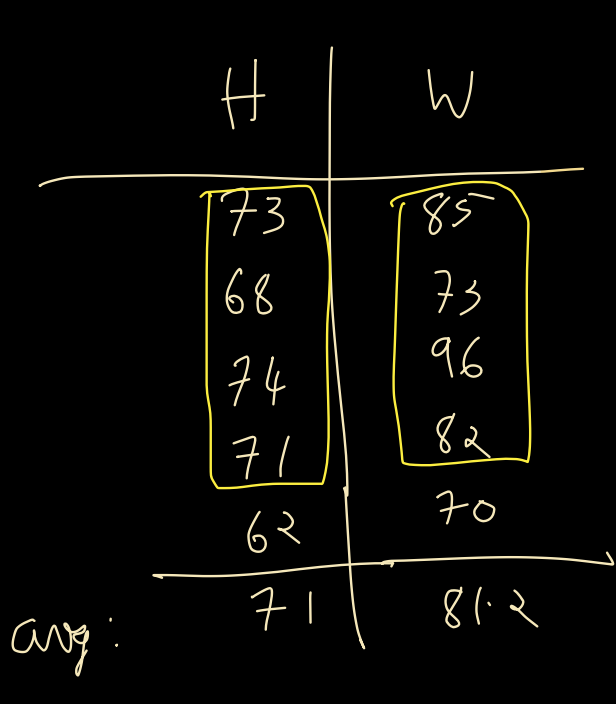



In this scenario, to fully determine the entire dataset consisting of two arrays, we only need to be aware of a minimum of **8 values** from either of the arrays.

This understanding can be expressed mathematically using degrees of freedom.

For two arrays with lengths $n_1$ and $n_2$, the degrees of freedom (dof) is calculated as the sum of the degrees of freedom for each array: $(n_1 - 1) + (n_2 - 1)$
- This can be further simplified to: $n_1 + n_2 - 2$

This concept becomes particularly useful when we delve into hypothesis testing.

<br>

> **Dof in T-Test context**

In the context of one-sample T-test and two-sample T-test, we often compare data with their respective averages.

The associated degrees of freedom play a crucial role here.
- For a two-sample T-test, the degrees of freedom become $n_1 + n_2 - 2$,
- Whereas, for a one-sample T-test, it simplifies to $n - 1$
- Note: Here 'n' is the sample size.

> <font color='purple'>**Setup 4:**</font>

Now, let's look at the data on Sachin's centuries and victories.

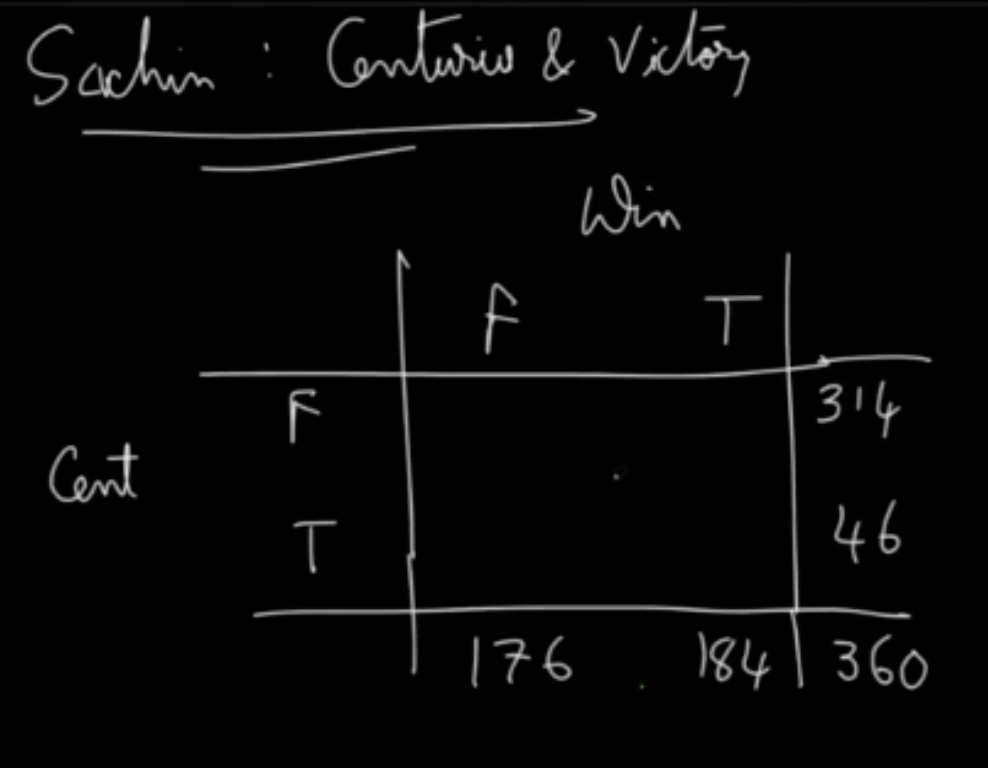

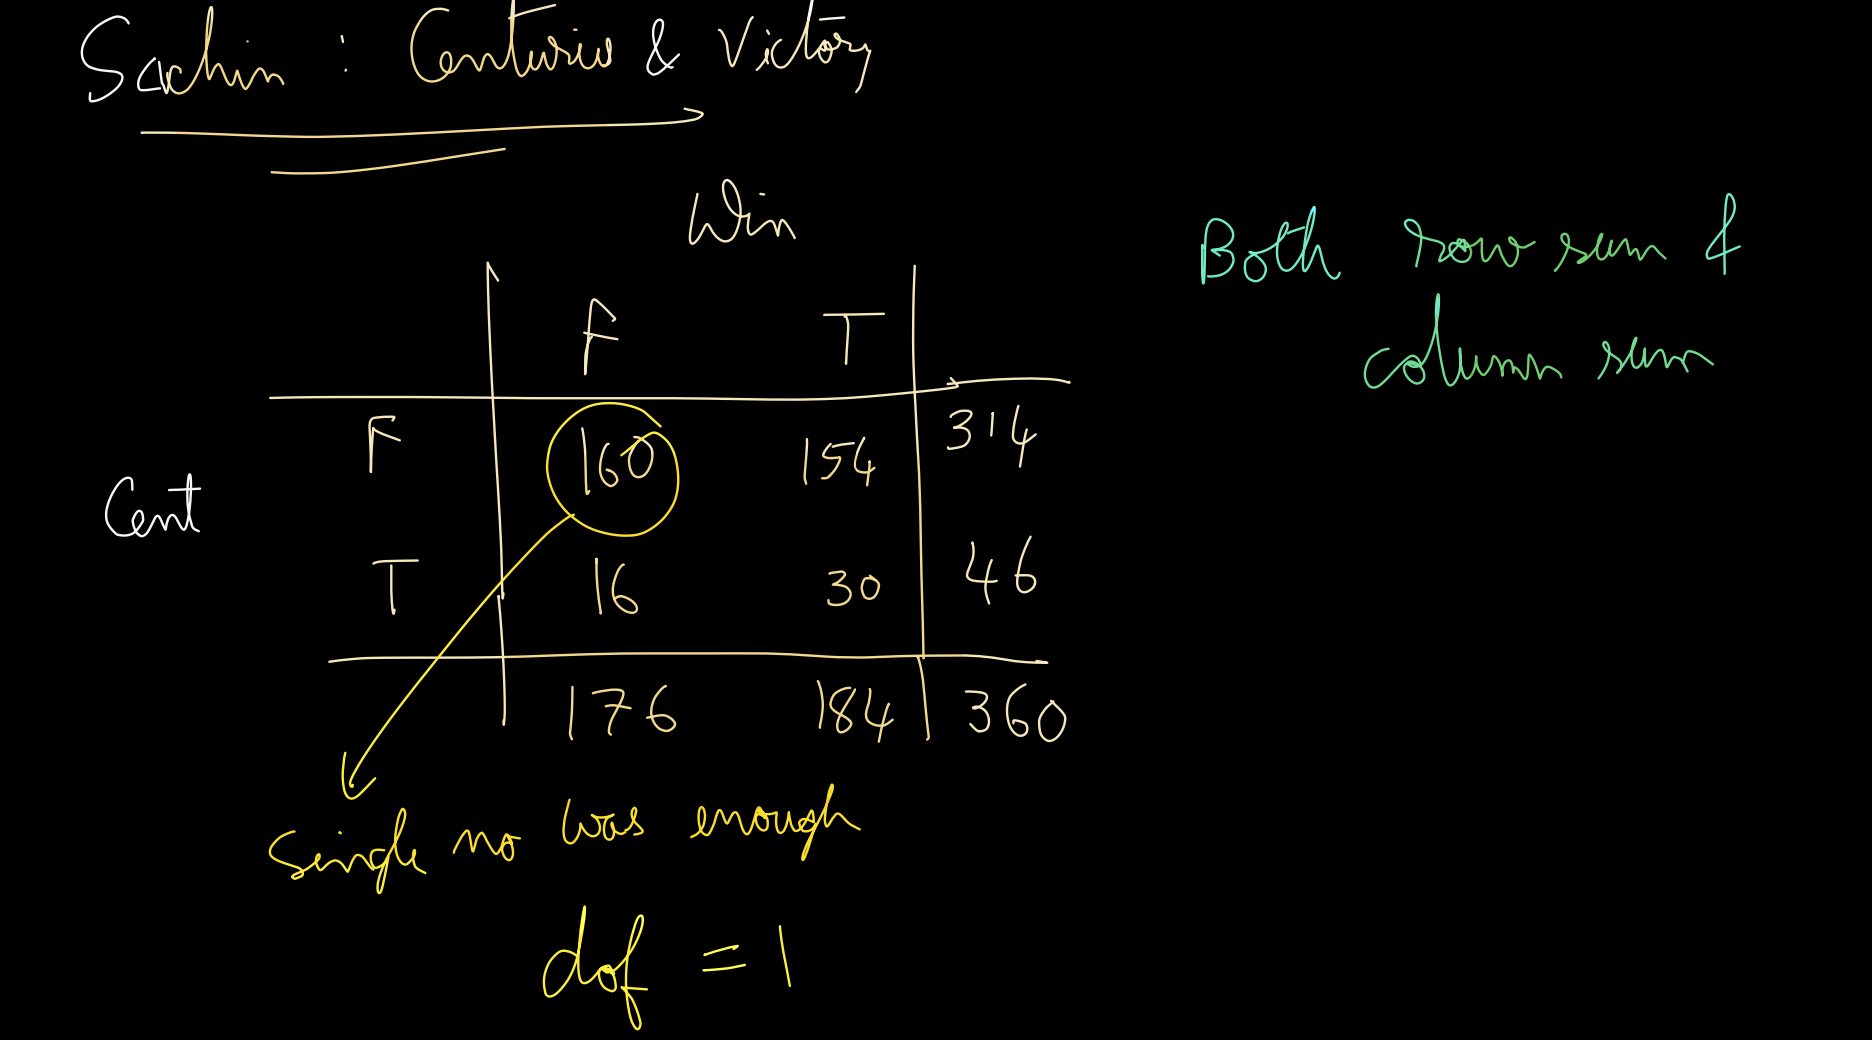

When considering the provided data, a single value is all that's required to build the entire table.

This means that having just one value allows us to deduce the rest of the values within the table.

<br>

The difference between this scenario and the previous examples lies in the information we possess.
- Here, we are armed not only with the averages of individual values but also with the sum values of both rows and columns.

<br>

<font color='violet'>**Explaination of how DOF is 1 here**</font>

In this scenario we have sum of rows and columns

- Let's consider first row which has total 314.
- In this scenario if we have 1 value out of 2 then we can easily calculate the 2nd value also ( total - 1st value = 2nd value)

  - We are giving 1st value of first row (160), so 2nd value will be (314 - 160 = 154)

  - Now by given only one value (160) we are able to complete 1st row (160, 154) and single single values in both columns also.

- For the first column by using the first value of first row (160) we can able to calculate remaining value of first column (176 - 160 = 16)

- Same for the second column by using second value of first row (154) that we calculated and sum of second column (184) we can able to calculate remaining value of second column (184 - 154 = 30)

We can observe that in this scenario we only need a **"Single value"** to complete the entire array, so DOF = 1 here.


<br>

Given this setup, the degrees of freedom for this context simplify to just **1**.

This means that with the sum of information available, we have enough constraints to determine all the remaining values within the table.

> <font color='purple'>**Setup 5:**</font>

Do you all agree with me when I say different politicians are famous in different regions?

The same politician will not be famous in Karnataka, Andhra or Maharashtra.

Let's take an example of regional support there 4 politicians -> A, B, C, and D and we have done a survey in three different cities -> X, Y, Z.

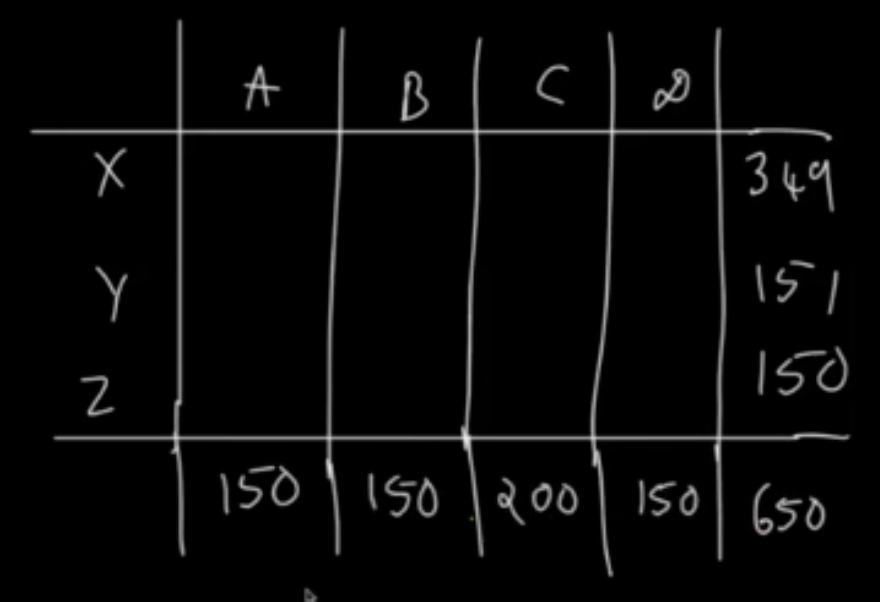

Now, that we have the overall data from the survey we conducted what are the bare minimum values we need to complete the data?

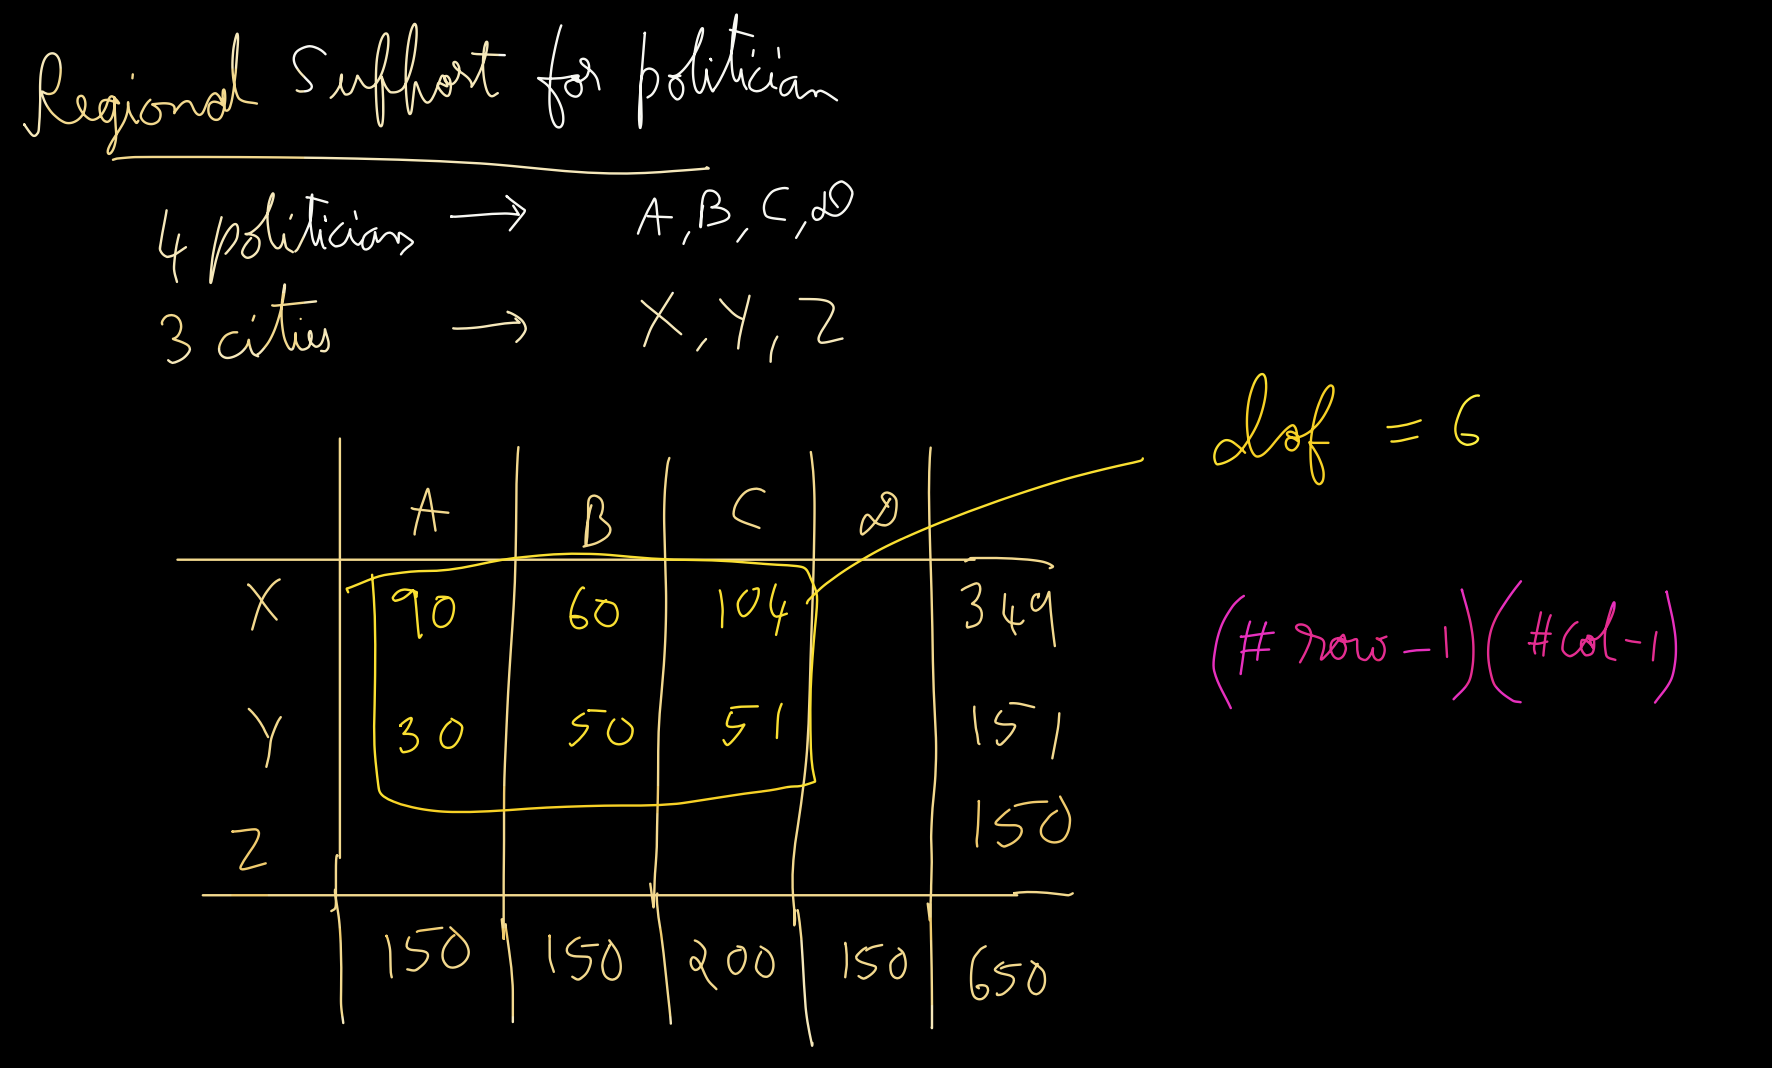

In this particular situation, having just **6 values** at our disposal is sufficient to construct the entire table.
- The key lies in recognizing the pattern formed by the data arrangement.

When we closely examine the data, we see the emergence of a small rectangle.
- The height of this rectangle, which contributes to the determination of the number of rows, is obtained by subtracting 1 from the total number of rows.
- Similarly, the width of the rectangle, which plays a role in the number of columns, is derived by subtracting 1 from the total number of columns.

<br>

Degrees of freedom are then calculated by multiplying these two dimensions together: `(#rows - 1) * (#columns - 1)`.

In this case, with 3 rows and 4 columns, it's `(3 - 1) * (4 - 1)`, resulting in `2 * 3`, which gives us **6**.

<br>

---

> <font color='purple'>**Now, why is this degree of freedom important?**</font>


1. In the context of the Chi-square test, degrees of freedom represent the **number of categories**, the value influences the critical values used to determine statistical significance.  

  - As degrees of freedom increase, the **chi-squared distribution changes shape.**

  - Higher degrees of freedom lead to higher critical values, requiring a larger test statistic to reject the null hypothesis at a given significance level (α).

2. A higher degree of freedom allows for **more variability** in the distribution of the test statistic.

3. Degrees of freedom help define the expected distribution of the test statistic under the null hypothesis.  

  - The expected distribution is a key reference point for evaluating the observed test statistic,
  - And determining whether deviations are statistically significant.

---

## <font color='blue'>Chi-square Goodness of fit test</font>

### <font color='purple'>Use Case: Coin Toss</font>

The Chi-squared test for goodness of fit is used when you have **one categorical variable**, and you want to see if the observed frequencies match the expected frequencies.


Now, to understand it let's start with a simple example of a coin toss which we all relate to.

In the coin toss, we toss the coin 50 times to test whether the coin is fair or not.

Here, **degrees of freedom  = 1**

Now, to do the hypothesis test to determine whether the coin is fair or not.

- $H_0$:The Coin is Fair.
- $H_1$: The Coin is Biased.

We know that a fair coin is expected to behave in a certain way.
- Yield heads and tails with 50% probability.
- This does not mean that if we toss a fair coin, `n` number of times, we will always get `n/2` heads and tails. There may be slight deviations.
- We need to check if the observed deviation is acceptable enough for us to stick with our default assumption of the coin being fair.

<br>

> **How to capture this deviation?**

One intuitive way would be to see the difference between the **observed value (Obs) and expected value (E)**,

i.e. `[Obs(Heads) - E(Heads)]` and `[Obs(Tails) - E(Tails)]`

The idea is:
- If the coin is actually fair (H0 is true), these difference would tend to be **small**.
- To avoid keeping a track of two differences, we add them to get a single metric: `[Obs(Heads) - E(Heads)] + [Obs(Tails) - E(Tails)]`
- However, within this small difference, it's important to note whether it's a **positive** or **negative** difference.
- Since they might cancel each other out, we take the square of these differences: $[O(H) - E(H)]^2 + [O(T) - E(T)]^2$
- Then, we divide this term by the Expected numbers: $\frac{[O(H) - E(H)]^2}{E(H)} + \frac{[O(T) - E(T)]^2}{E(T)}$
  - This is done because the sum of squared differnce, we're currently evaluating, can yield very large values.


---


Let's define an experiment, such that it consists of 50 (or `n` times in general) coin tosses.

- We already know that <u>**under the assumption of H0**</u> (i.e. toss a **fair** coin), expected number of heads = tails = 25.
- Let's say we calculate the chi-square statistic for this experiment.

**Note:**
- The expected number of heads and tails, would make the chi square stat equal to 0
- It is more likely that a fair coin would yield a smaller chi square test stat value.
- It is less likely for this value to be large, given that the coin is fair.
  - Larger chi-square values indicate greater deviations from the expected frequencies, suggesting the possibility of the coin not being fair.

<br>

In order to collect multiple data points, suppose we repeat this experiment of 50 coin tosses 10,000 times.
- And note down the calculated chi-square test statistic yielded by each experiment.

Now, if we plot a histogram to represent the observed test stat value for all the 10,000 simulations, we would observe:
- Assuming that the coin is fair, majority of test stat values should be small.
- However, there will be a few cases where the observed test statistic value is relatively high due to chance or randomness.
  - These cases represent instances where the observed frequencies deviate significantly from the expected frequencies.
  - Naturally, the frequency of such cases will be less compared to those with smaller test statistic values.

In summary, the distribution of the chi-square test statistic will likely be **right-skewed (concentrated towards left)**.

This distribution reflects the likelihood of observing deviations from expected frequencies due to chance alone.








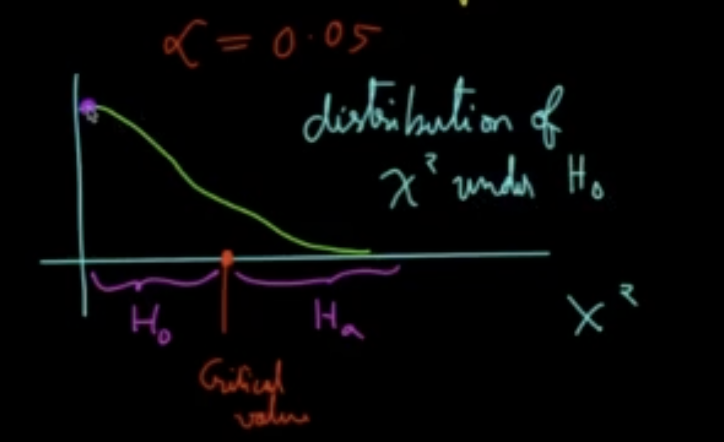

> **Q. While plotting the distribution, can some experiments (out of the 10,000) have a different sample size than 50 (or `n` in general)?**

No.

If we alter the no of coin tosses in individual experiments, the value of degree of freedom would change for them.

In order to plot $χ^2$, the dof parameter has to stay constant for all datapoints, as that would impact the distribution.

> <font color="purple">**How do we conclude the results of a given experiment? Whether the coin is fair or biased?**</font>

Based on the significance level that we decide, there will be a **critical value** (a threshold), that would divide our histogram into two regions: A and B

- It helps us draw a line between what we consider statistically significant (indicating a biased coin) and what we consider within the permissible range (indicating a fair coin).
- This threshold aids us in making confident judgments about the fairness or bias of the coin based on the observed chi-square values.

<Br>

Hence, while using Chi Square test, all we need to do is
- Figure out what the Chi square distribution looks like, based on the data given (by evaluating dof parameter)
- Calulate the test statistic
- Based on the significance level, check which region would the calculated stat value lie in
  - If it is in Region A, we can conclude that we **Fail to reject H0** (i.e. coin is fair)
  - Else, if it is in Region B, we can conclude that we **Reject H0** (i.e. coin is biased).

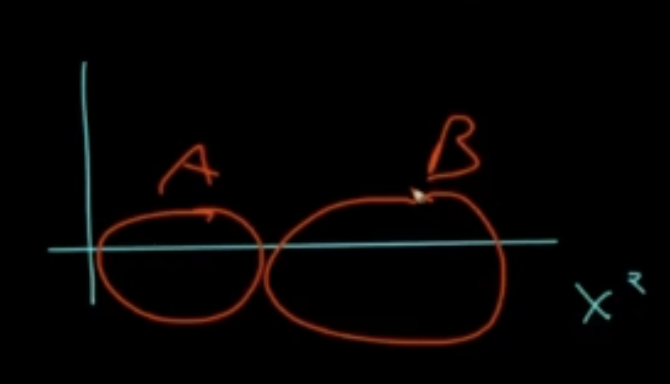

This is known as the **Chi-Statistic** that yields **Chi-square Distribution**

And this modified framework is called **Chi square Test**.

> <font color='purple'>**How does dof plays a role in the chi-squared testing to accept/reject H0?**</font>


**Critical Values:**

- As degrees of freedom increase, the chi-squared distribution changes shape.  

- Higher degrees of freedom lead to higher critical values as per the chi-squared distribution tables, requiring a larger test statistic to reject the null hypothesis at a given significance level (α).

<br>

**P-Value:**

- With increasing degrees of freedom, the distribution becomes less skewed, resulting in smaller tail areas.  

- Smaller tail areas mean smaller p-values for the same observed test statistic.  

- More degrees of freedom lead to a higher likelihood of obtaining a smaller p-value for the same data.

<br>

**Intuitive Explanation:**

- Degrees of freedom represent flexibility in your analysis.  


- More degrees of freedom mean you need a larger difference between observed and expected values to confidently reject the null hypothesis.  

- Critical values rise, and p-values decrease with more degrees of freedom.

- Fewer degrees of freedom make it easier to reject the null hypothesis with smaller differences.

#### <font color='purple'>**Example(Coin Toss):**</font>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2

<font color='purple'>**Question:**</font>

```
You have a coin. You wish to ensure that it is fair.

You decide to toss it 50 times, and note the observations.

The observed outcomes from 50 coin tosses are 28 heads and 22 tails.

Determine if the coin is fair or biased.
```

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/068/692/original/Screenshot_2024-03-22_at_12.44.58_PM.png?1711097666">

> Discussion:

- To assess whether a coin is fair or not, we need to compare the expected outcomes with the observed outcomes of tossing the coin.

- The expected outcome for a fair coin toss is 50% heads and 50% tails, which corresponds to 25 heads and 25 tails in 50 tosses.
- This is different from the observed outcomes.
- In order to determine whether the coin is fair, we perform a chi-square test to check if the observed results significantly deviate from the expected results.
- If the deviation is statistically significant, it may indicate that the coin is not fair.

##### <font color='green'>**STEP 1:**</font>

> **What should be the null and alternate hypothesis?**
- $H_0$:The Coin is Fair.
- $H_1$: The Coin is Biased.



##### <font color='green'>**STEP 2:**</font>

> **What is the distribution?**

- Chi-square distribution.

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/068/693/original/Screenshot_2024-03-22_at_2.25.08_PM.png?1711097721">

##### <font color='green'>**STEP 3:**</font>

We perform chi-square test and calculate the P-Value

In [ ]:
chi_stat, p_value = chisquare(
    [28, 22], # Observed or actual
    [25, 25], # Expected
)
print("p_value:",p_value)
print("chi_stat:",chi_stat)

p_value: 0.3961439091520741
chi_stat: 0.72


##### <font color='green'>**STEP 4:**</font>

We defined $α = 0.05$ for confidence level 95%

In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Coin is baised")
else:
    print("Fail to reject H0")
    print("Coin is fair")

Fail to reject H0
Coin is fair


<font color='purple'>Solving the same using the formula.</font>

In [ ]:
#Using the formula
(28 - 25)**2/25 + (22 - 25)**2 /25 # chi2stat

0.72

In [ ]:
1 - chi2.cdf(0.72, df=1)

0.3961439091520741

In [ ]:
chi2.ppf(0.95, df=1) # If the chi-squared value is greater than 3.84 we reject the null hypothesis at 5% significance level

3.841458820694124

---

## <font color='blue'>Chi-square Test for Independence</font>

The Chi-squared test for independence is used when you have **two categorical variables**, and you want to see if they are **related or independent** of each other.  

Let's look into it:

<font color='purple'>**Motivation:**</font>

```
Imagine you are running a Marketing Campaign in your company.

There are 2 modes through which customers can purchase the company's products: Offline and Online.

Your goal is to run a campaign that aims at increasing the number of online purchases.
```

Let's say the Marketing Strategist makes a claim:
- That marketing campaign should focus on women
- Females have a higher chance of purchasing online than males

This is another way of saying that there is a dependency between **purchase style and the gender** of the customer.

- But, this is a hypothetical scenario
- Before making any business decisions, you'd want to **test and evaluate this assumption**.

We want to find our whether there is really or NOT a Dependency between these two variables
  - Gender and Purchases

<br>

> **How do we check our assumptions and validate them?**

- We need to analyze Purchase preferences (Online or Offline) for both Genders (Male and Female)
- To decide whether or NOT we should focus our Marketing Campaign only on 1 gender
- We need a way to test the dependency of one variable on another
- Before we start the campaign

This is where **Test of Independence** comes into the picture
- Test whether our assumptions/beliefs about that dependency between Gender and Purchase preferences are even True or NOT
- This becomes our motivation to discuss the **Test of Independence**

### <font color='purple'>Gender Vs Offline and Online</font>

Testing independence with `chi2_contingency`

Now, let us say we are conducting a survey on whether gender impacts offline and online purchases.

In the survey, we got the following data:


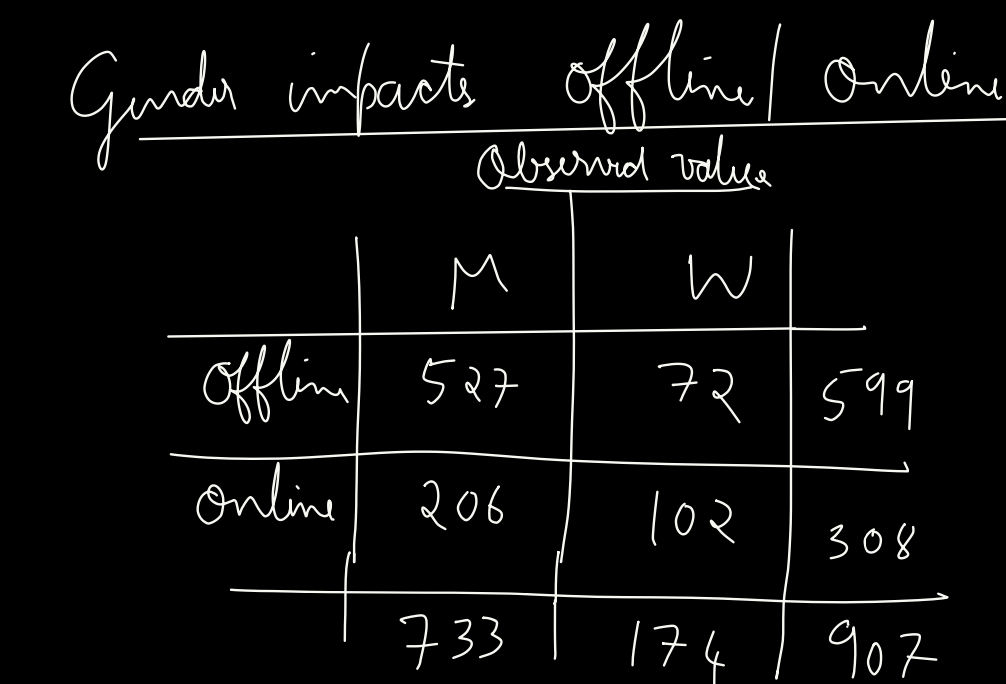


Based on the setup, we define our hypothesis as:
- $H_0$: Gender and preference are independent
- $H_1$: Gender and preference are not independent


> **In this scenario, under the assumption of null hypothesis do we have the expected value?**

Firstly, we observe that 66% of the respondents prefer offline and 34% of the respondents prefer online.

- Now, if gender has no impact then among 733 men, how many are expected to prefer offline? => 66% of 734 = 484
- Now, if gender has no impact then among 172 women, how many are expected to prefer offline? => 66% of 174 = 115
- Now, if gender has no impact then among 733 men, how many are expected to prefer online? => 34% of 734 = 249
- Now, if gender has no impact then among 172 women, how many are expected to prefer online? => 34% of 174 = 59

All the expected values are calculated using the observed values.

<br>


Therefore, we can calculate the chi-squared value as: $χ^2 = \frac{(527-484)^2}{484} + \frac{(72-115)^2}{115} + \frac{(206-249)^2}{249} + \frac{(102-59)^2}{59}$

<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/068/696/original/Screenshot_2024-03-22_at_2.27.48_PM.png?1711097883">

In [ ]:
from scipy.stats import chi2_contingency

##### <font color='green'>**STEP 1:**</font>

> **What should be the null and alternate hypothesis?**

- $H_0$: Gender and preference are independent
- $H_1$: Gender and preference are not independent

##### <font color='green'>**STEP 2:**</font>

> **What is the distribution?**

- Chi-square distribution.

##### <font color='green'>**STEP 3:**</font>

We perform chi-square test and calculate the P-Value

In [ ]:
observed = [
    [527, 72],
    [206, 102],]

chi_stat, p_value, df, exp_freq = chi2_contingency(observed) # chi_stat, p_value, df, expected values
print("chi_stat:",chi_stat)
print("p_value:",p_value)
print("df:",df)
print("exp_freq:",exp_freq)

chi_stat: 57.04098674049609
p_value: 4.268230756875865e-14
df: 1
exp_freq: [[484.08710033 114.91289967]
 [248.91289967  59.08710033]]


##### <font color='green'>**STEP 4:**</font>

We defined $α = 0.05$ for confidence level 95%

In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print("Gender and preference are not independent")
else:
    print("Fail to reject H0")
    print("Gender and preference are independent")

Reject H0
Gender and preference are not independent


The difference between this example and the above coin toss example.

- In coin toss -> we just fit the expected distribution
- Preference vs Gender -> Here we are testing for independence


---

## <font color='blue'> Assumptions of the chi-square test</font>

1. Random Sample
 - The data points for each group in your analysis must have come from a simple random sample.
 - This is important because if your groups were not randomly determined then your analysis will be incorrect.
 - In statistical terms this is called bias, or a tendency to have incorrect results because of bad data.

1. Variables are categorical

2. Mutually Exclusive Groups
 - The two groups of your categorical variable should be mutually exclusive.

 - For example, if your categorical variable is hungry (yes/no), then your groups are mutually exclusive, because one person cannot belong to both groups at once.

2. Observations are independent
 - Each of your observations (data points) should be independent.
 - This means that each value of your variables doesn’t “depend” on any of the others.
 - For example, this assumption is usually violated when there are multiple data points over time from the same unit of observation (e.g. subject/customer/store).
 - Because the data points from the same unit of observation are likely to be related or affect one another.
 - A different test must be used if the researcher’s data consists of paired samples, such as in studies in which a parent is paired with his or her child.
4. The value of the cell expected should be **5 or more** in at least 80% of the cells, and no cell should have an expected of less than one

---
---
